<a href="https://colab.research.google.com/github/Mudassaralimosu/tensorflow-deep-learning/blob/main/01_Neural_Network_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Regression with Neural Network in TensorFlow 

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter...predicting a number

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


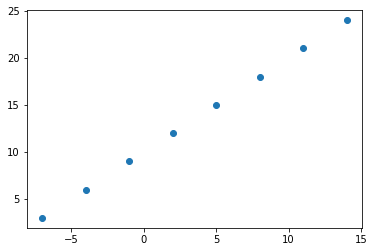

In [2]:
# Creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
X=np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0,14.0])

# Create labels
y=np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it 
plt.scatter(X,y)

In [3]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [4]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
# Input and Output shapes
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
X[1], y[1]

(-4.0, 6.0)

In [9]:
X[0].ndim

0

In [10]:
X[0], y[0]

(-7.0, 3.0)

In [11]:
# Turn out Numpy arrays into tensors
X=tf.constant(X)
y=tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

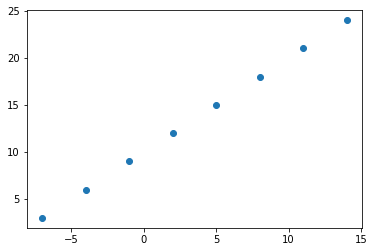

In [12]:
plt.scatter(X, y)

Steps in Modelling with Tensorflow

1. Creating a model - define the input and output layers,as well as the hidden layers of a deep learning model.

2. Compiling a model - define the loss function(in other words,the function which tells our model how wrong it is)and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [13]:
# X = tf.cast(tf.constant(X), dtype=tf.float32)
# y = tf.cast(tf.constant(y), dtype=tf.float32)
# We're doing this because in the video it showed warning to use float

In [14]:
tf.random.set_seed(42) # set random seed

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, #mae is short for mean absolute error
                optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"] )

model.fit(X, y, epochs=5) # fit the model 



Epoch 1/5
1/1 [==============================] - 1s 549ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


Loss - how wrong your model's predictions are compared to the truth labels(you want to minimise this)

optimizer - how your model should update its internal patterns to better its predictions

Metrics - human interpretable value for how well your model is doing

Epochs - how many times the model will go through all of the training examples

In [15]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [17]:
y_pred + 11

array([[23.71602]], dtype=float32)

Improving the Model

In [18]:
# let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model(this time we'll train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 260ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 6

In [19]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [20]:
# Let's see if model's prediction has improved...
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [21]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 389ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 6ms/step 

In [22]:
model.predict([17.0]) # it is a example of overfitting it is learning the model too good 

array([[31.223137]], dtype=float32)

Common ways to improve a deep model:

* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization functions
* Change the learning rate
* fitting on more data
* fitting for longer

In [23]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation=None),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 277ms/step - loss: 12.2895 - mae: 12.2895
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.7908 - mae: 11.7908
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2845 - mae: 11.2845
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7678 - mae: 10.7678
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2381 - mae: 10.2381
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.6928 - mae: 9.6928
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.1289 - mae: 9.1289
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 8.5437 - mae: 8.5437
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 7.9341 - mae: 7.9341
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 7.2971 - mae: 7.2971
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - 

In [24]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [25]:
model.predict([17.0])

array([[30.220297]], dtype=float32)

In [26]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation=None),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 367ms/step - loss: 12.5419 - mae: 12.5419
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.4726 - mae: 12.4726
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12.4032 - mae: 12.4032
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 12.3338 - mae: 12.3338
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 12.2644 - mae: 12.2644
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 12.1950 - mae: 12.1950
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 12.1256 - mae: 12.1256
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 12.0561 - mae: 12.0561
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 11.9866 - mae: 11.9866
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 11.9171 - mae: 11.9171
Epoch 11/100
1/1 [==============================] - 0s 3m

In [27]:
model.predict([17.0])

array([[31.509876]], dtype=float32)

In [28]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation=None),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1/1 [==============================] - 0s 375ms/step - loss: 12.0125 - mae: 12.0125
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2511 - mae: 11.2511
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4828 - mae: 10.4828
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 9.7066 - mae: 9.7066
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 8.9205 - mae: 8.9205
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 8.1219 - mae: 8.1219
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 7.3079 - mae: 7.3079
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9190 - mae: 6.9190
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.2155 - mae: 7.2155
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.4987 - mae: 7.4987
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 7.7691 - ma

In [29]:
model.predict([17.0]) # best model iska loss bhi less than 1 se aur mae bhi

array([[26.260729]], dtype=float32)

Learning rate is the most important hyperparameter of many different neural network

Evaluting a model

In practise, a typical workflow you'll go through when building neural network is:

 ---

 Build a model->fit it->evaluate it->tweak a model->fit it->evaluate it->fit it->evaluate it...

when it comes to evaluation..there are 3 words you should memorize:

"Visualize, Visualize, Visualize"

It's a good idea to visualize

* The data - what data are we working with?what does it look like?

* The model itself - what does our model look like?

* The training of a model - how does a model perform while it learns?

* The predictions of the model - how do the predictions of a model line up against the ground truth(the original labels) ?


In [30]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [31]:
 y = X+10
 y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

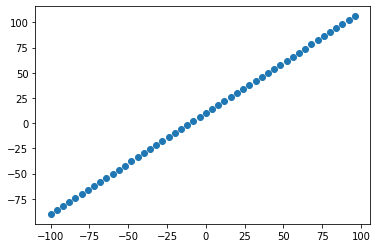

In [32]:
 # Visualize the data
 import matplotlib.pyplot as plt
 plt.scatter(X,y)

The 3 sets...

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available

* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.

* Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available

In [33]:
# Check the length of how many samples we have
len(X)

50

In [34]:
# Split the data into train and test data
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train=y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

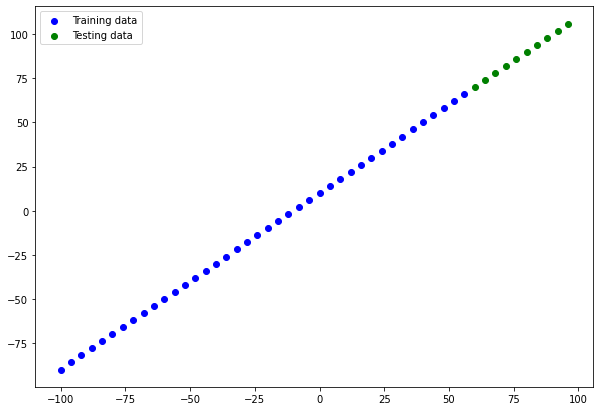

In [35]:
### Visualizing the data
plt.figure(figsize=(10,7))

#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

# show a legend 
plt.legend()

In [47]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
                           tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [48]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

let's create a model which builds automatically by defining the input_shape arguments in the first layer
tf.random.set_seed(42)

Create a model (same as above)
model = tf.keras.Sequential([
                          tf.keras.layers.Dense(1, input_shape=[1])
])

Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]) 
yeh wala run nhi kiye hai isse phele wla mein change krke run kiye

In [50]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.

* Trainable parameters - these are the parameters (patterns) the model can update as it trains.

* Non-trainable params - these parameters aren't updated during training(this is typical when you bring in already learn patterns or 
parameters from other model during transfer learning

Resource: For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.
 

In [51]:
# let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [52]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [53]:
from tensorflow.keras.utils import plot_model

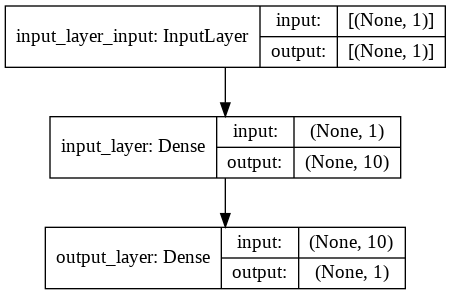

In [54]:
plot_model(model=model, show_shapes=True)

### Visualizing our model predictions


In [55]:
# Make some predictions 
y_pred = model.predict(X_test)
y_pred

array([[ 70.46815 ],
       [ 75.04999 ],
       [ 79.63183 ],
       [ 84.21368 ],
       [ 88.79552 ],
       [ 93.37737 ],
       [ 97.959206],
       [102.54105 ],
       [107.1229  ],
       [111.704735]], dtype=float32)

In [56]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [57]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compare predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

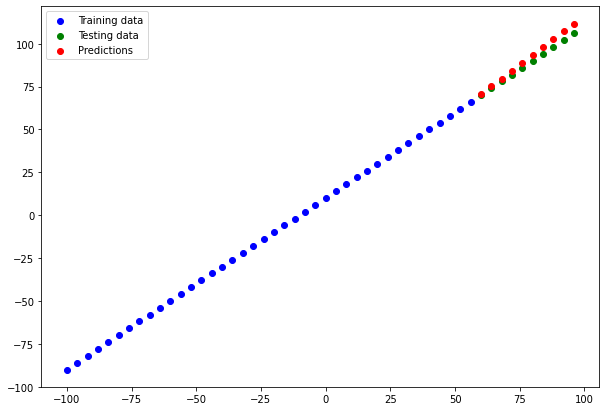

In [58]:
plot_predictions()

### Evauating our model predictions with regression evaluation metrics

Mean Absolute Error(MAE) - 
tf.keras.losses.MAE() 
           or
tf.metrics.mean_absolute_error()

when to use - As a great starter metric for any regression problem


Mean Square Error(MSE): tf.keras.losses.MSE() or tf.metrics.mean_square_error()

when to use - when large errors are more significant then smaller errors.

Huber - tf.keras.losses.Huber()

when to use: Combination of MSE or MAE.Less sensitive to outliers than MSE

In [59]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 120ms/step - loss: 3.0864 - mae: 3.0864


[3.086442470550537, 3.086442470550537]

In [60]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.625483 , 14.170008 , 11.747269 , 10.3572645, 10.       ,
       10.675474 , 12.383682 , 15.232843 , 19.122902 , 23.704735 ],
      dtype=float32)>

In [61]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.46815 ],
       [ 75.04999 ],
       [ 79.63183 ],
       [ 84.21368 ],
       [ 88.79552 ],
       [ 93.37737 ],
       [ 97.959206],
       [102.54105 ],
       [107.1229  ],
       [111.704735]], dtype=float32)>

In [62]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [63]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.46815 ,  75.04999 ,  79.63183 ,  84.21368 ,  88.79552 ,
        93.37737 ,  97.959206, 102.54105 , 107.1229  , 111.704735],
      dtype=float32)>

In [64]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.0864425>

In [65]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [66]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.46815 ,  75.04999 ,  79.63183 ,  84.21368 ,  88.79552 ,
        93.37737 ,  97.959206, 102.54105 , 107.1229  , 111.704735],
      dtype=float32)>

In [67]:
# Calculate the mean square error
mse=tf.metrics.mean_squared_error(y_true=y_test,
                                  y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=12.319103>

In [68]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=y_pred)
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=y_pred)

### Running experiments to improve our model

1. Get more data - get more example for your model to train on(more opportunities to learn patterns or realtionships between features and labels).

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer

3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. 'model_1' - same as the original model, 1 layer, trained for 100 epochs

2. 'model_2' - 2 layers trained for 100 epochs

3. 'model_3' - 2 layers trained for 500 epochs


**Build model_1**

In [73]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

In [69]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [75]:
X_test, y_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

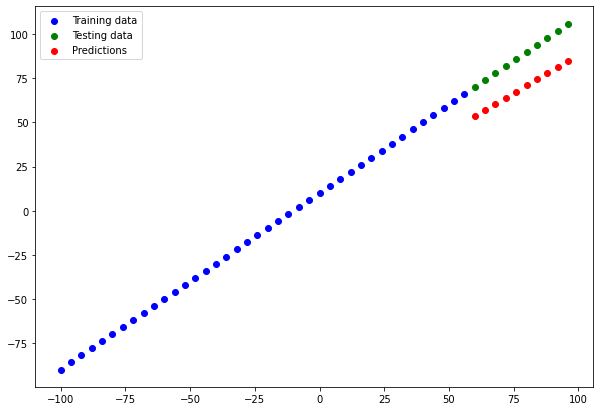

In [77]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [82]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>)

In [81]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build model_2**

* 2 dense layers, trained for 100 epochs

In [83]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3.Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [========================

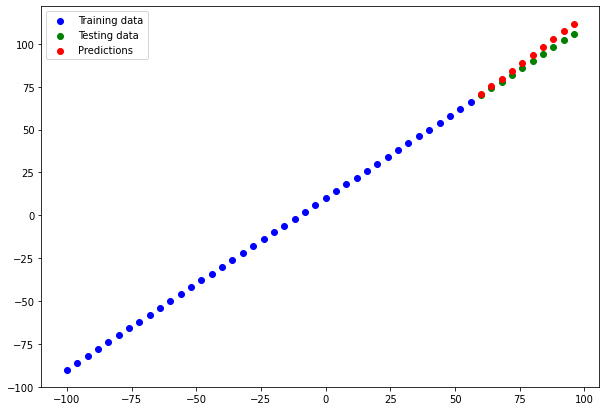

In [84]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [86]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, tf.squeeze(y_preds_2))
mse_2 = mse(y_test, tf.squeeze(y_preds_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build model_3**

In [88]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 5ms/

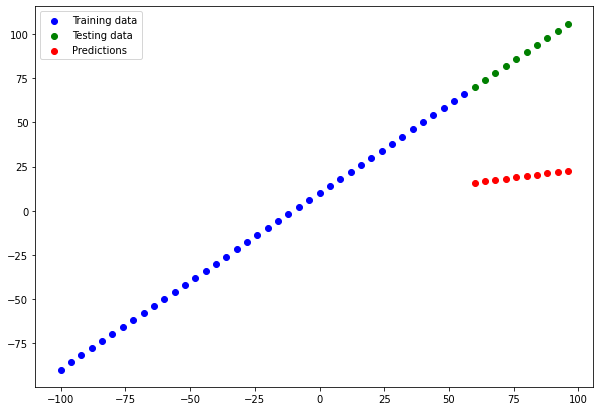

In [90]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3) # overfitting example

In [92]:
# Calculate model_3 evalaution metrics
mae_3 = mae(y_test, tf.squeeze(y_preds_3))
mse_3 = mse(y_test, tf.squeeze(y_preds_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary

## Comparing the results of our experiments

we've run a few experiments, let's compare the results

In [93]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]


all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


Looks like model_2 performed the best...

In [94]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note:** One of your main goals should be to minimize the time between your experiments. The more experients you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.


And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us !

**Resources** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).

* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard)




## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in web application or mobile

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format


In [101]:
# Save Model using the SavedModel format
model_2.save("best_model_SavedModel_format") 

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [103]:
# Save Model using the HDF5 format - this format is good for saving large files
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [104]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [105]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [113]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [114]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format")
loaded_h5_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [115]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [118]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [107]:
model_2_preds, loaded_SavedModel_format_preds

(array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32), array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32))

In [119]:
# Compare the MAE of model_2 preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

In [110]:
model_2_preds.squeeze()

array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)

In [111]:
loaded_SavedModel_format_preds.squeeze()

array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)

In [112]:
model_2_preds.squeeze() == loaded_SavedModel_format_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [120]:
# Download a model(or any other file) from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>